In [1]:
import sys
sys.path.append('/Users/murre/Documents/Github/borsdata-sdk/')

from os import getenv
from borsdata_sdk import BorsdataAPI
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 200


api_key = getenv('BORSDATA_API_KEY')
bors_api = BorsdataAPI(api_key)


In [16]:
instruments = bors_api.get_instruments()

In [3]:
first = instruments[1]

first.__dict__

{'insId': 3,
 'name': 'ABB',
 'urlName': 'abb',
 'instrument': 0,
 'isin': 'CH0012221716',
 'ticker': 'ABB',
 'yahoo': 'ABB.ST',
 'sectorId': 5,
 'marketId': 1,
 'branchId': 23,
 'countryId': 1,
 'listingDate': '1999-06-22T00:00:00',
 'stockPriceCurrency': 'SEK',
 'reportCurrency': 'USD'}

In [9]:
abb_entries = bors_api.get_instrument_stock_price(3)

abb_entries[1].__dict__

{'i': None,
 'd': '2004-03-12',
 'h': 42.0837,
 'l': 40.4276,
 'c': 41.5966,
 'o': 40.6225,
 'v': 5280516}

In [5]:
abb_pd = pd.DataFrame([entry.__dict__ for entry in abb_entries]).set_index('d')
abb_pd.head()


,i,h,l,c,o,v
d,,,,,,
2004-03-11,None,41.9863,40.2328,41.2070,41.7915,7696567
2004-03-12,None,42.0837,40.4276,41.5966,40.6225,5280516
2004-03-15,None,41.9863,40.4276,40.5251,41.7915,4471781
2004-03-16,None,41.7915,40.6225,41.6940,40.8173,3837278
2004-03-17,None,42.8630,41.7915,42.5708,41.9863,3214308


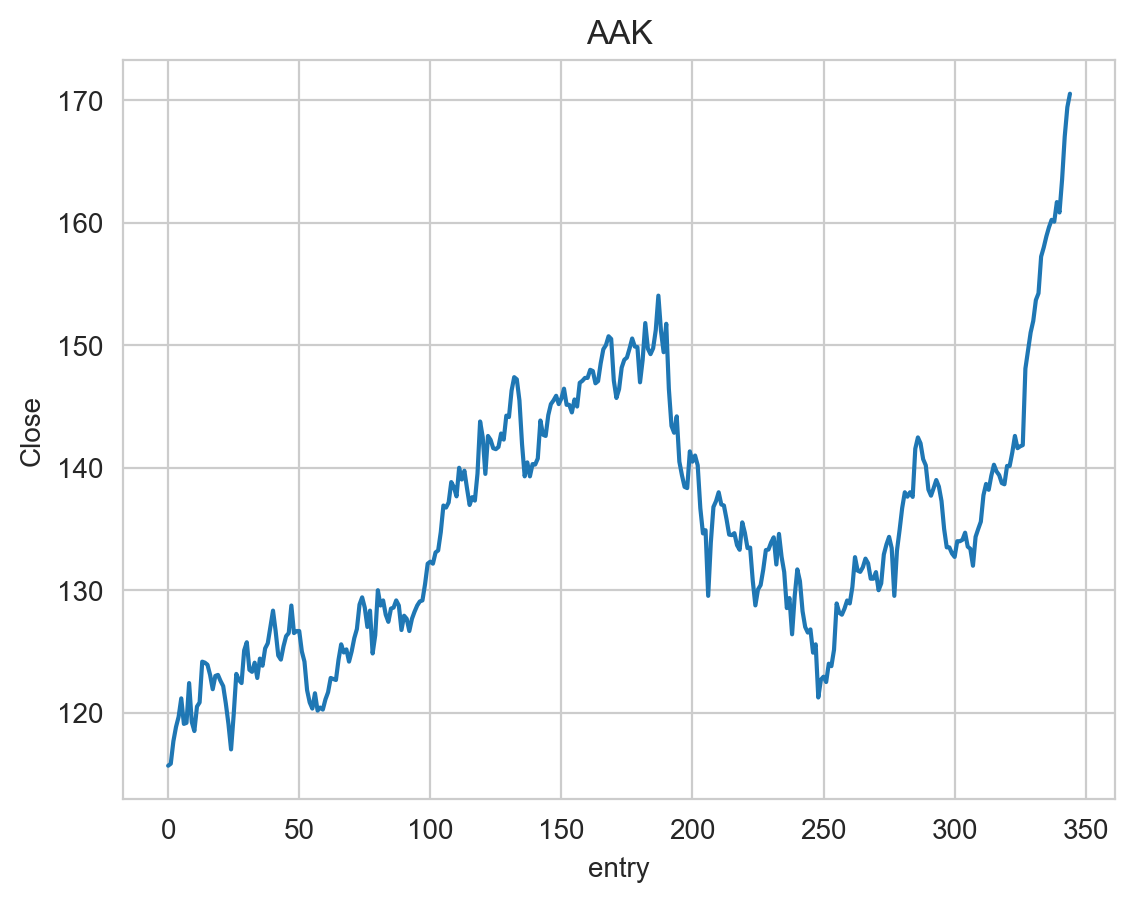

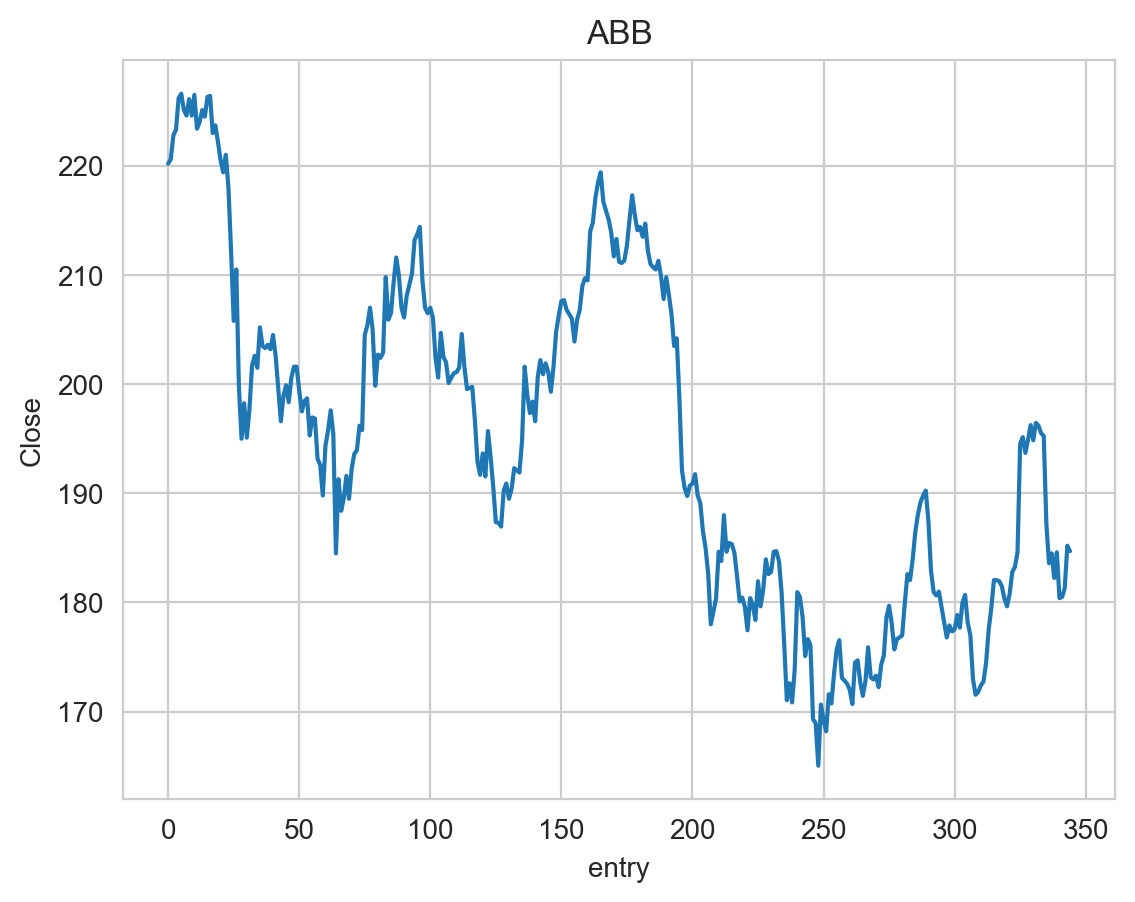

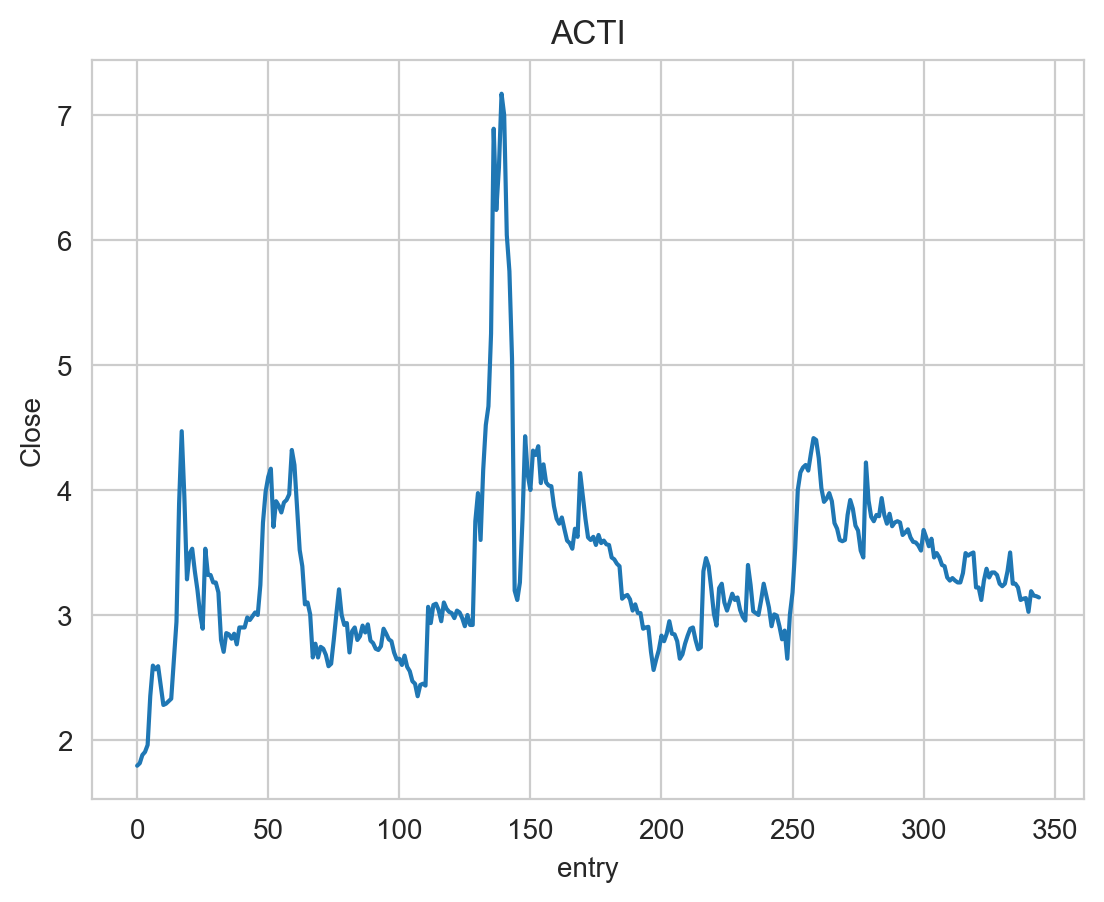

In [10]:
for instrument in instruments[:3]:
    ins_entries = bors_api.get_instrument_stock_price(instrument.insId, '2018-01-01', '2019-05-17')
    ins_pd = pd.DataFrame([entry.__dict__ for entry in ins_entries])
    
    plt.xlabel('entry')
    plt.ylabel('Close')
    plt.title(instrument.ticker)
    plt.plot(ins_pd['c'])
    plt.show()


In [11]:
first

3: ABB

In [15]:
bors_api.get_all_instrument_reports(3)

{'instrument': 3,
 'reportsYear': [{'year': 2022,
   'period': 5,
   'revenues': 307213.0626,
   'gross_Income': 101305.401,
   'operating_Income': 34815.2547,
   'profit_Before_Tax': 35409.9414,
   'profit_To_Equity_Holders': 25821.9225,
   'earnings_Per_Share': 13.52651415,
   'number_Of_Shares': 1909.0,
   'dividend': 9.32510478,
   'intangible_Assets': 124331.2527,
   'tangible_Assets': 49578.0912,
   'financial_Assets': 30349.8879,
   'non_Current_Assets': 204259.2318,
   'cash_And_Equivalents': 43359.9636,
   'current_Assets': 204175.767,
   'total_Assets': 408434.9988,
   'total_Equity': 137581.2897,
   'non_Current_Liabilities': 97518.1857,
   'current_Liabilities': 172448.7099,
   'total_Liabilities_And_Equity': 408434.9988,
   'net_Debt': 28993.5849,
   'cash_Flow_From_Operating_Activities': 13427.3997,
   'cash_Flow_From_Investing_Activities': 10234.8711,
   'cash_Flow_From_Financing_Activities': -24976.8414,
   'cash_Flow_For_The_Year': -1314.5706,
   'free_Cash_Flow': 2366

In [27]:
(str(instruments[25]))

'37: Biotage'

In [ ]:
instruments